In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['image.cmap']='gray'

In [23]:
def get_mnist_image(x):
    return np.rollaxis(np.rollaxis(x[0:200].reshape(20,-1,28,28),0,2),1,3).reshape(-1,20*28)

In [24]:
X_train = pd.read_csv("D:\\M_AI\\Advance Deep Learning and Computer Vision\\Projects\\train.csv").values[:,1:]
#Converting the pixel value to 0-1
X_train = (X_train-np.min(X_train,0))/(np.max(X_train,0)+0.0001)

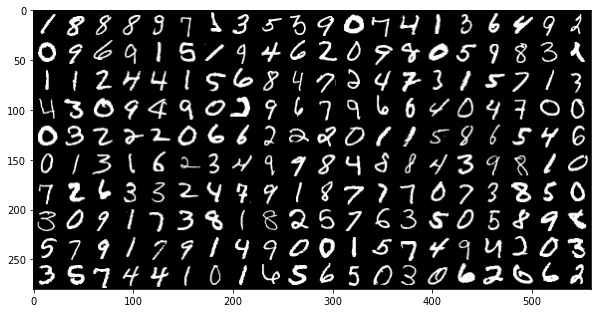

In [25]:
plt.figure(figsize=(10,20))
plt.imshow(get_mnist_image(X_train))

In [26]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100,learning_rate=0.01,random_state=0,verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -119.88, time = 10.86s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -104.69, time = 12.29s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -97.89, time = 12.86s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -93.30, time = 12.82s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -90.68, time = 12.82s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -88.08, time = 12.92s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -86.59, time = 12.88s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -84.69, time = 12.92s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -83.13, time = 12.89s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -83.08, time = 12.77s


BernoulliRBM(learning_rate=0.01, n_components=100, random_state=0, verbose=True)

In [27]:
#to generate new numbers using rbm we use gibbs sampling, we iterate it over 1000 samples
xx = X_train[0:40].copy()
for i in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

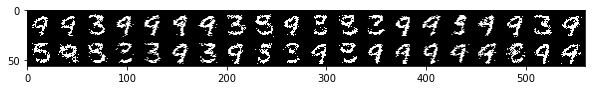

In [28]:
# display those new generated 40 numbers
plt.figure(figsize=(10,20))
plt.imshow(get_mnist_image(xx))

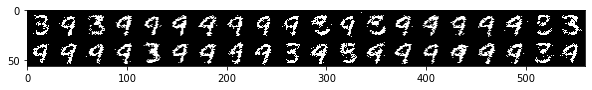

In [29]:
# Running it over 10000 iterations to get the numbers more accurately
xx = X_train[0:40].copy()
for i in range(10000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])
        
plt.figure(figsize=(10,20))
plt.imshow(get_mnist_image(xx))        

Text(0.5, 0.98, 'The components extracted by RBM are')

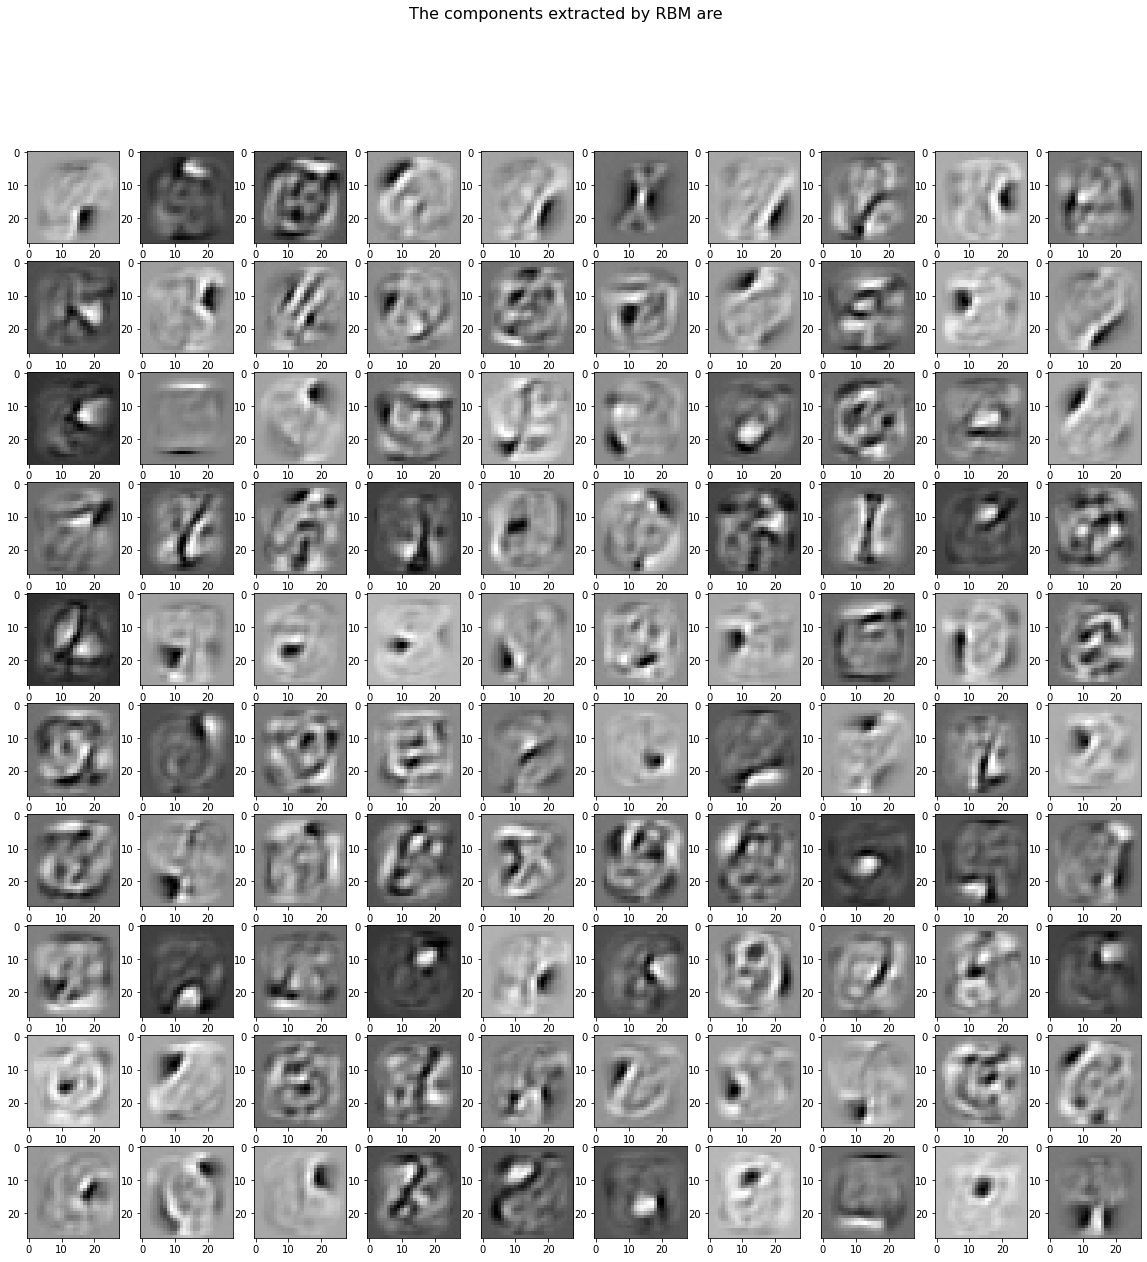

In [30]:
plt.figure(figsize=(20,20))
for i,comp in enumerate(rbm.components_):
    plt.subplot(10,10,i+1)
    plt.imshow(comp.reshape((28,28)),cmap=plt.cm.RdBu,interpolation='nearest',vmin=-2.5,vmax=2.5)
    plt.imshow(comp.reshape((28,28)))
    #plt.axis("off")    
plt.suptitle("The components extracted by RBM are",fontsize=16)